In [1]:
import pandas as pd
x=pd.read_csv(r"C:\Users\vidya\Downloads\AIDS_Classification.csv")
x

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091,3,21,53.2980,1,0,0,100,0,1,...,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,...,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,...,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,...,0,1,0,0,0,166,169,999,1838,1


In [2]:
pd.set_option("Display.Max_columns",100)

In [3]:
x.head(2)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,0,0,0,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162,218,392,564,1


In [4]:
x.shape

(2139, 23)

In [5]:
x.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

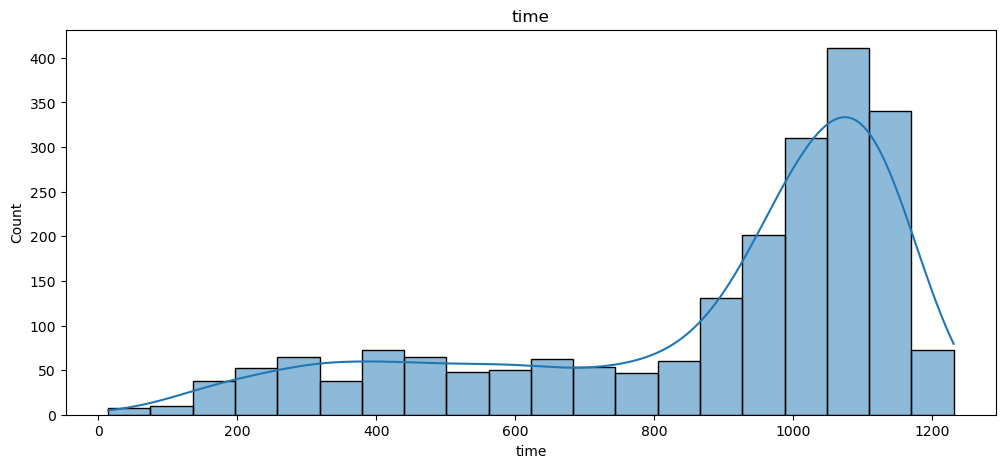

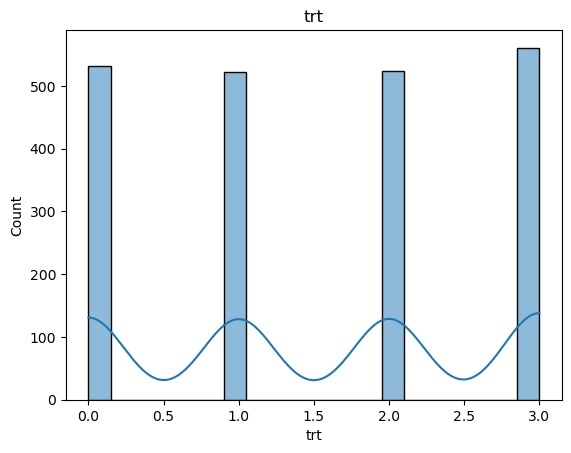

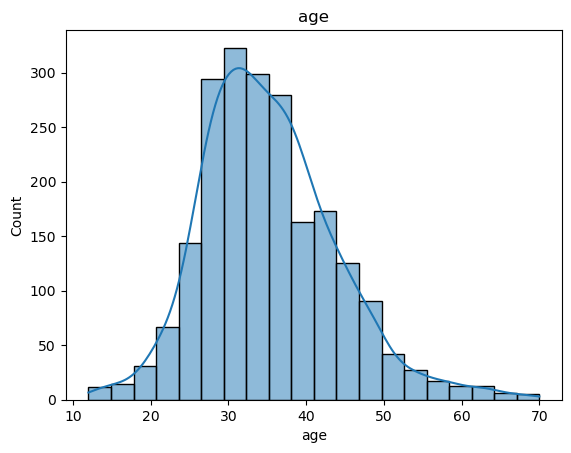

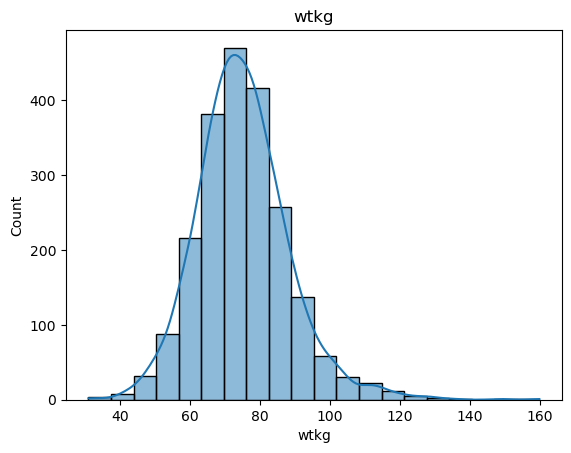

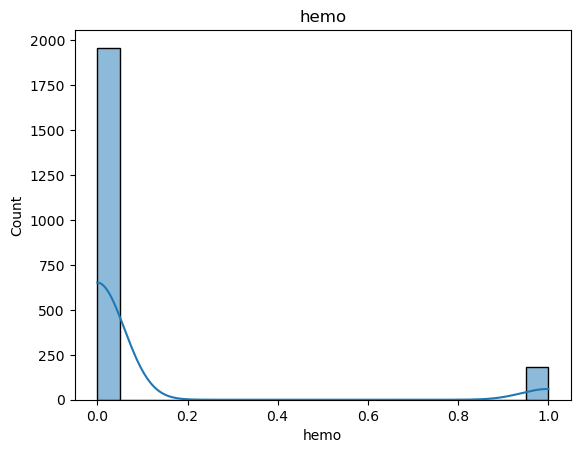

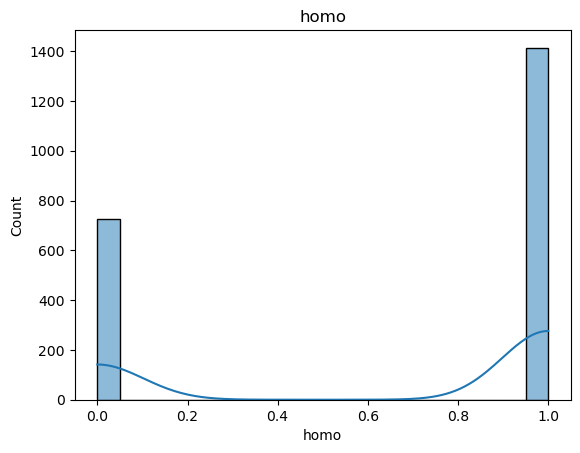

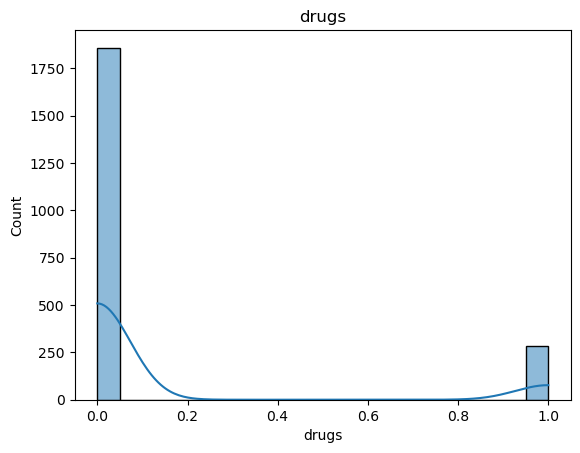

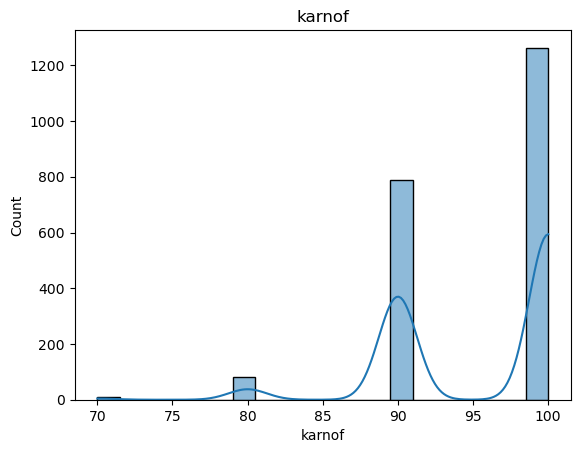

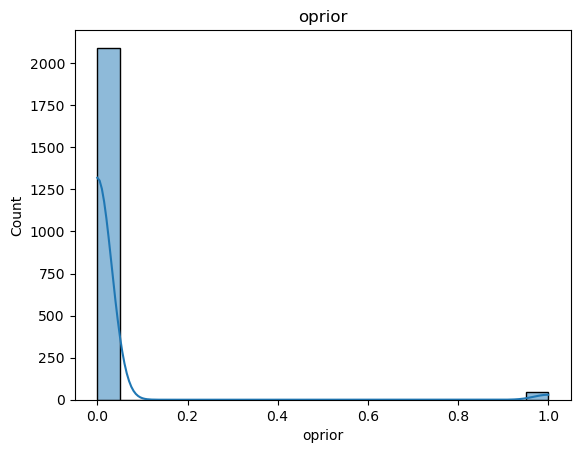

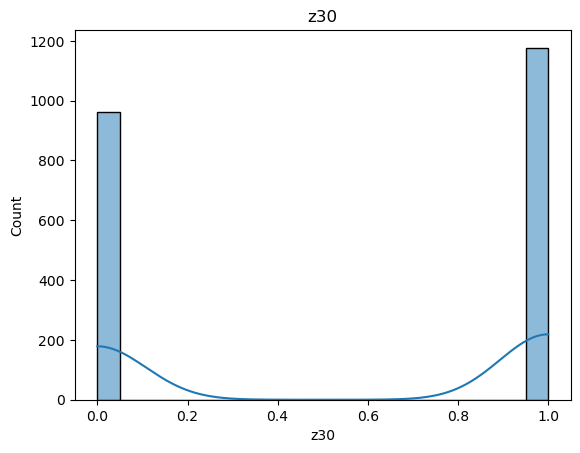

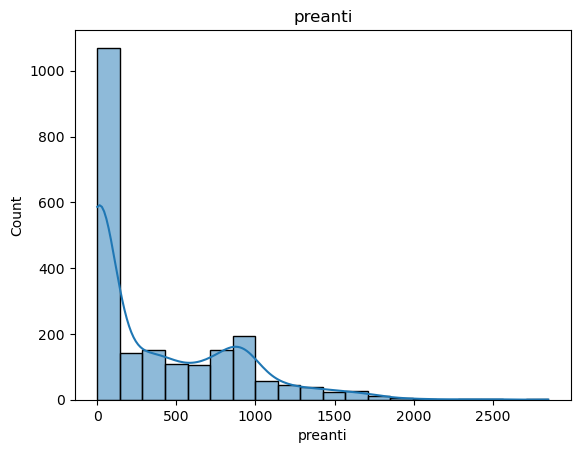

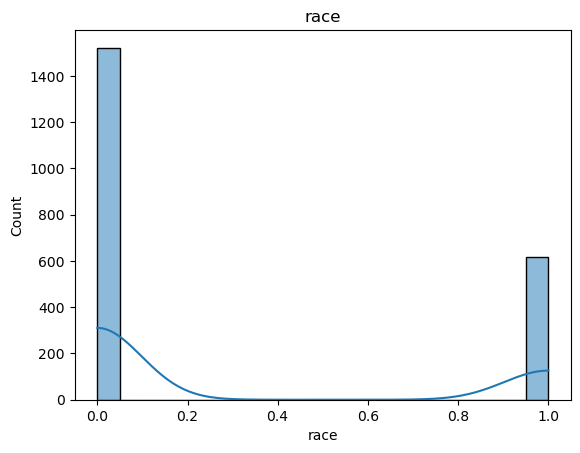

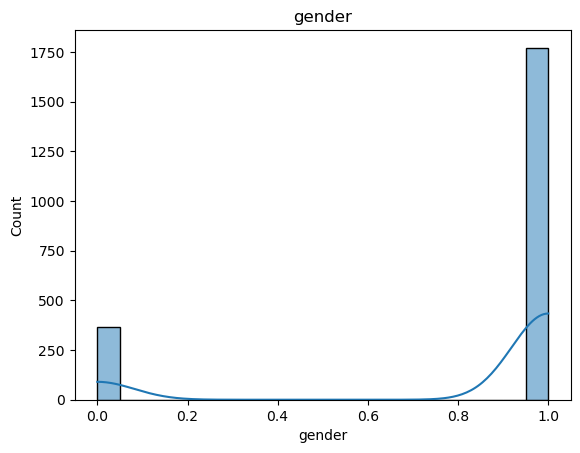

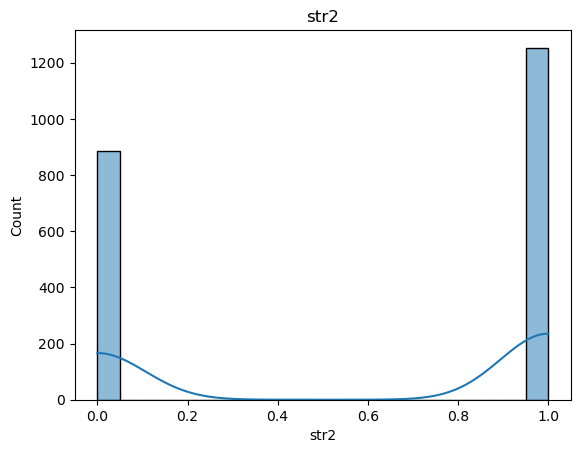

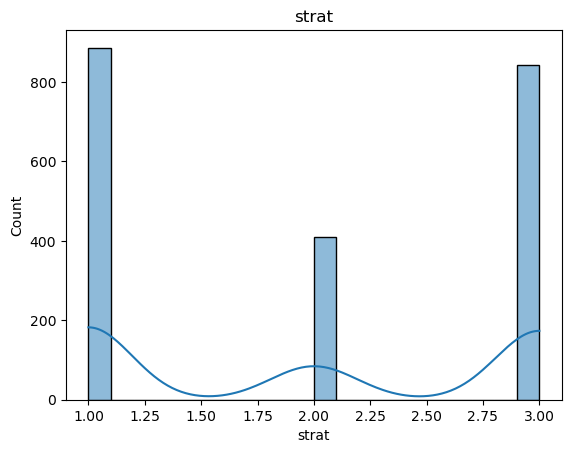

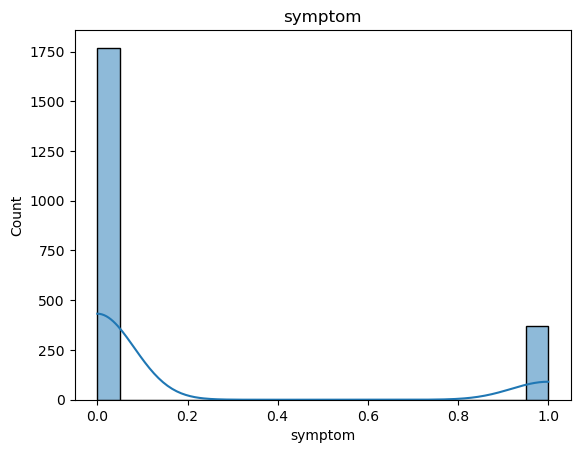

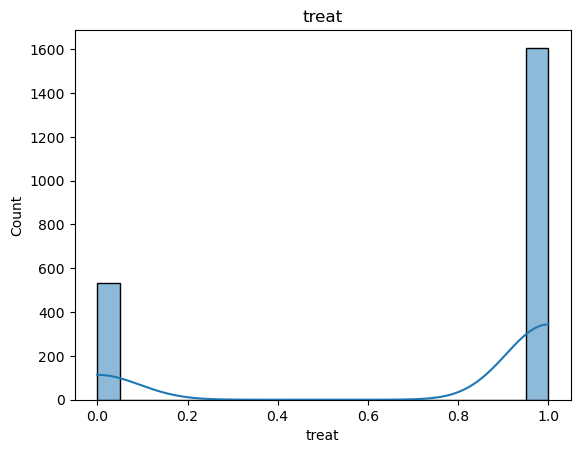

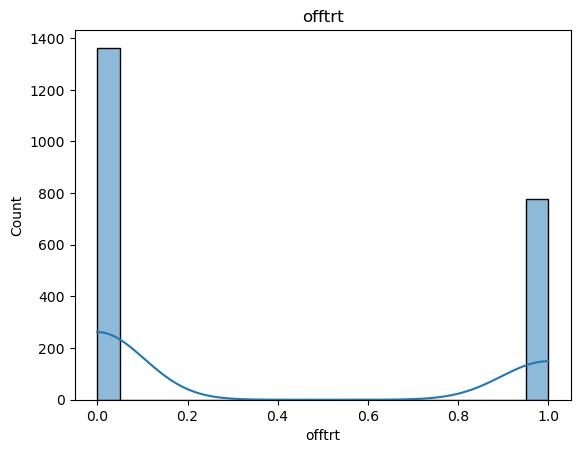

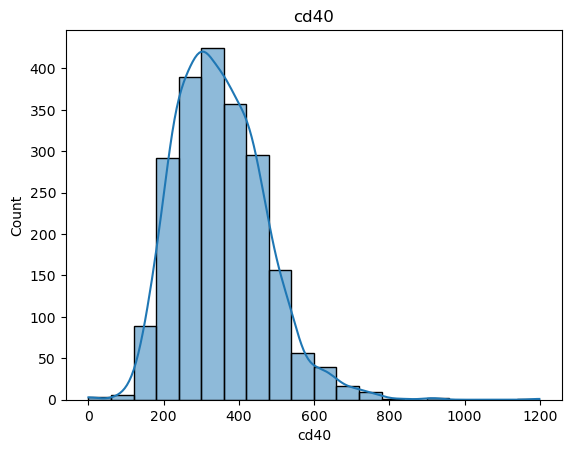

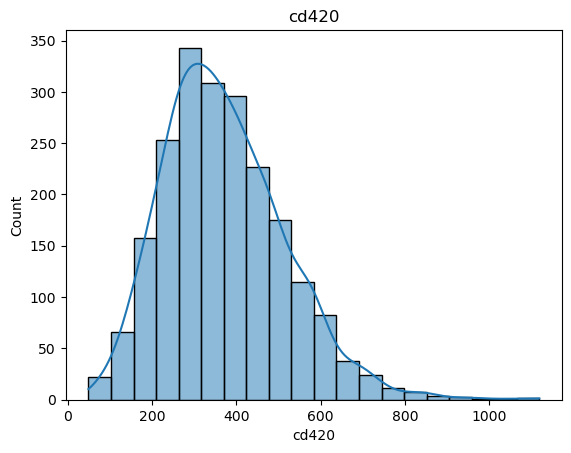

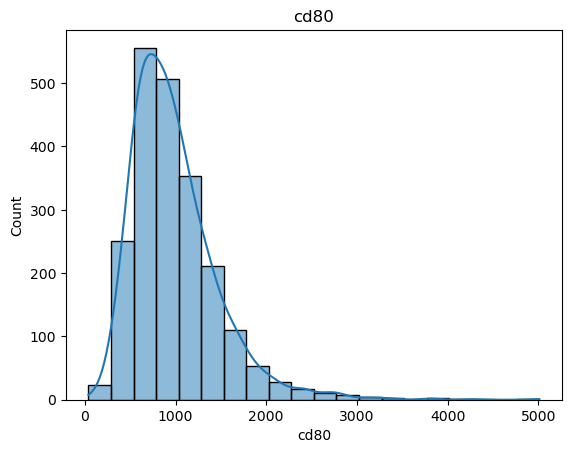

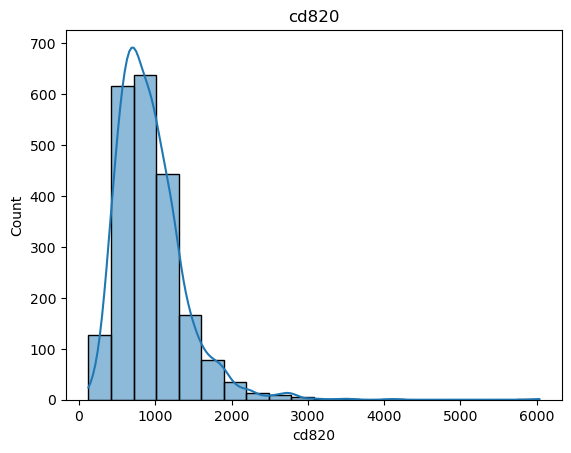

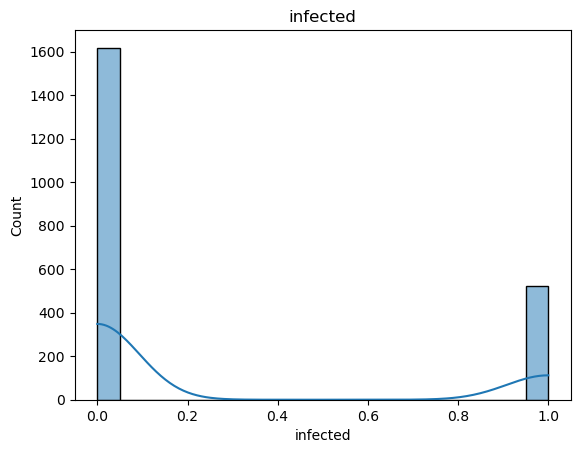

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[12,5])
for i in x.columns:
    sns.histplot(x[i],bins=20,kde=True)
    #plt.scatter(x[i],x[i])
    plt.title(i)
    plt.show()
    

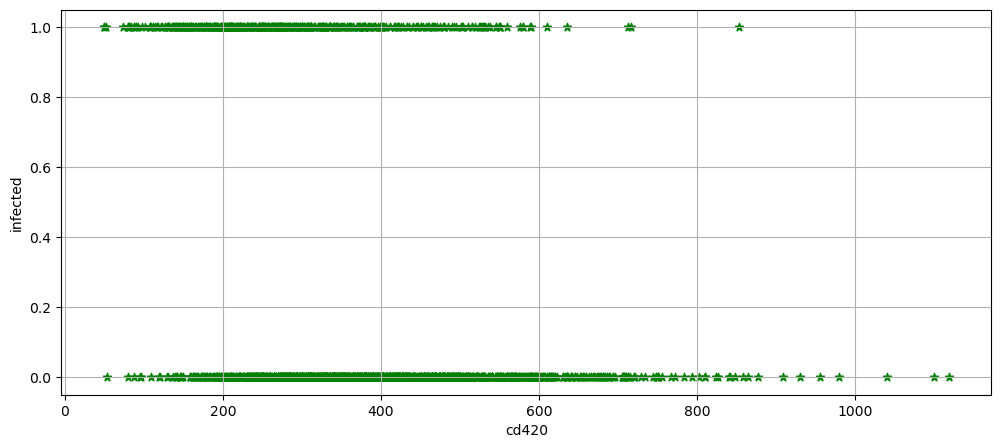

In [8]:
plt.figure(figsize=[12,5])
plt.scatter(x["cd420"],x["infected"],c="g",marker="*")
plt.xlabel("cd420")
plt.ylabel("infected")
plt.grid(True)
plt.show()            
            

In [9]:
import pandas as pd
F=x[["cd420"]]
T=x["infected"]


In [10]:
F

,cd420
0,477
1,218
2,274
3,394
4,353
...,...
2134,109
2135,218
2136,364
2137,169


In [11]:
T

0       0
1       1
2       0
3       0
4       0
       ..
2134    0
2135    0
2136    0
2137    1
2138    0
Name: infected, Length: 2139, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(F,T,train_size=0.80)

In [13]:
X_train.shape

(1711, 1)

In [14]:
X_test.shape

(428, 1)

In [15]:
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV
A=LogisticRegression()
B=Lasso()
C=Ridge()
A.fit(X_train,y_train)

LogisticRegression()

In [16]:
print("SIMPLE LOGISTIC REGRESSION")
print("Trainning Accuracy:",A.score(X_train,y_train))
print("Testing Accuracy:",A.score(X_test,y_test))

SIMPLE LOGISTIC REGRESSION
Trainning Accuracy: 0.7872589129164231
Testing Accuracy: 0.7757009345794392


In [17]:
B.fit(X_train,y_train)

Lasso()

In [18]:
print("LASSO")
print("Trainning Accuracy:",B.score(X_train,y_train))
print("Testing Accuracy:",B.score(X_test,y_test))

LASSO
Trainning Accuracy: 0.11527434472884102
Testing Accuracy: 0.1354943659663138


In [19]:
C.fit(X_train,y_train)

Ridge()

In [20]:
print("RIDGE")
print("Trainning Accuracy:",C.score(X_train,y_train))
print("Testing Accuracy:",C.score(X_test,y_test))

RIDGE
Trainning Accuracy: 0.11553838644859182
Testing Accuracy: 0.13618114769558098


In [21]:
p={"alpha":[0.001,0.0001,0.01,0.34,0.1,34,1,10]}

In [22]:
import warnings
warnings.filterwarnings("ignore")
G=GridSearchCV(B,param_grid=p,scoring="accuracy",cv=5)
G.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.0001, 0.01, 0.34, 0.1, 34, 1, 10]},
             scoring='accuracy')

In [23]:
pred=A.predict(X_test)
pred[1:5]
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       325
           1       0.65      0.15      0.24       103

    accuracy                           0.78       428
   macro avg       0.72      0.56      0.55       428
weighted avg       0.75      0.78      0.72       428



In [25]:
print(confusion_matrix(y_test,pred))

[[317   8]
 [ 88  15]]


In [26]:
print("accuracy_score:",accuracy_score(y_test,pred))

accuracy_score: 0.7757009345794392


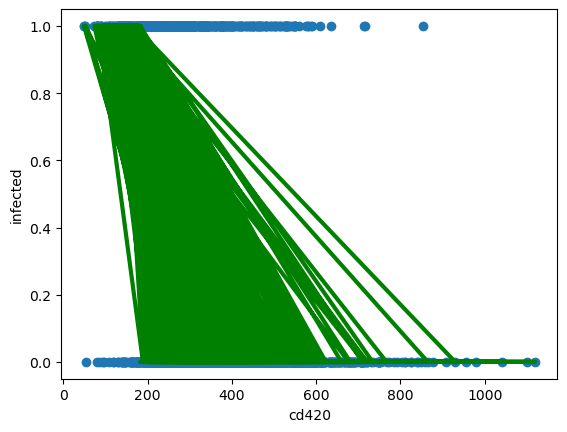

In [27]:
plt.scatter(F,T)
plt.plot(F,A.predict(F),color="g",lw=3)
plt.xlabel("cd420")
plt.ylabel("infected")
plt.show()

In [28]:
A.intercept_

array([1.3596268])

In [29]:
A.coef_

array([[-0.00740708]])